# Projeto: Retrato da cobertura vacinal contra **Póliomielite** no Brasil na ultima decada (2010 - 2020)
A **Póliomielite**, também conhecida como **Pólio** ou então **Paralisia Infantil** é uma doença viral, sem cura, que em casos graves, atinge o sistema nervoso, ataca a medula espinhal, degenerando a função motora, prevalecendo uma incidência maior nos membros inferiores. Não existe um tratamento específico, sendo a **vacinação** a medida mais importante para evitar o contágio da doença.<br>
Segundo o portal Veja-Saúde, em sua matéria entitulada [Estamos mesmo livres da Poliomelite?](https://saude.abril.com.br/blog/com-a-palavra/estamos-mesmo-livres-da-poliomielite/) consta **Organização Mundial da Saúde** estipulou uma **meta de 95%** para a cobertura vacinal contra a **Pólio**.<br>
Qual é o Histórico da cobertura vacinal contra a **Pólio** no Brasil? O Brasil cumpre a meta estipulada pela OMS? Essas e outras questões vão ser respondidas nessa pesquisa.

## Objetivo
Esse projeto tem como objetivo a pesquisa sobre a cobertura vacinal no Brasil contra a **Pólio** na ultima decada, e essa pesquisa majoritariamente ocorre utilizando a base de dados do SUS, também conhecido como [DATASUS](http://www2.datasus.gov.br/).<br>
Os dados desse estudo, uma vez que são públicos e serão divulgados em rede social, porderão ajudar governos e instituições na conscientização e definição de campanhas e políticsa públicas dependendendo do seu resultado.

## Escopo
### Faz parte
- O projeto tem como principal característica a análise em carater **Nacional**, fazendo o uso das informações Estaduais ou até municipais para melhor entender o todo.
- O projeto se baseia principalmente nas informações contidas no *DATASUS*
- O projeto vai focar nos dados relacionados a Poliomielite (Causa) e Paralisia Flácida Aguda (Efeito), podendo utilizar outras coberturas vacinais como base de comparação, e não como proósito principal de análise.
- O projeto vai focar no período entre os anos de 2010 e 2020, que é suficiênte para se ter uma noção da evolução e de tendências.
- O peojeto visa fazer uso dos dados d por estado ou município se for importante para a análise

### Não faz parte
- Não faz parte do escopo a consideração do ano de 2021, uma vez que o mesmo se encontra incompleto.
- Não faz parte do escopo uma análise estadual ou municipal minunciosa. Caso seja necessára, se fará para melhor compreensão dos dados de carater nacional.


### Observações importantes
- O ano de **2020** foi incluído na análise, mais precisa ser considerado com cautela, uma vez que por causa da **pandemia de COVID-19** os hábitos mudaram e as restrições e confinamentos nesse período podem ter alterado o padrão de vacinação.

# *Import* das bibliotecas

In [6]:
import pandas as pd
import glob
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import linregress


plt.style.use('ggplot')

# Leitura e tratamento dos dados relacionados a cobertura de vacinação no Brasil dw 1994 até 2021

## Leitura
Os dados podem ser encontrados no seguinte caminho:<br>
Portal da Saúde (SUS) >> Assistência à saúde >> Imunizações >> Cobertura<br><br>
Seleção dos dados:<br>
Linha: Imuno<br>
Coluna: Ano<br>
Medida: Coberturas Vacinais<br>
Período Disponível: 1994 - 2021<br>

Maiores informações podem ser encontradas [aqui](http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf)

## Tratamento
1. Leitura do arquivo CSV
2. Período de análise compreende a ultima decada (2010 - 2020)
3. index = 'ano'

## Features extas
1. Média móvel de período = 3 anos
2. Velocidade de movimento da média móvel (diferenciação)
3. Aceleração do movimento da média móvel (diferenciação)

ano,cobertura_polio_no_brasil,rolling,velocidade,aceleracao
2010,99.35,101.063333,-2.026667,-1.496667
2011,101.33,101.446667,0.383333,2.410000
2012,96.55,99.076667,-2.370000,-2.753333
2013,100.71,99.530000,0.453333,2.823333
2014,96.76,98.006667,-1.523333,-1.976667


<AxesSubplot:>

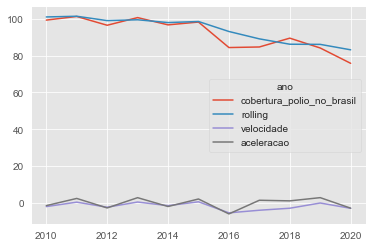

In [7]:
# Cobertura da vacinação contra Poliomelite no Brasil
cobertura_brasil = pd.read_csv(r'../data/raw/vac_cobertura_ano/cobertura_por_imuno_por_ano_1994-2021.csv', sep=';', decimal=',', encoding='ISO-8859-1',
                         skipfooter=1, engine='python')
# Transpõe Linhas e Colunas
cobertura_brasil = cobertura_brasil.set_index('Imuno').T

# Remove a linha de totais do DataFrame
cobertura_brasil = cobertura_brasil.drop(' Total')

# Extrai somente a coluna 'Poliomelite' do Dataframe de imunos/ano
cobertura_brasil = cobertura_brasil[['Poliomielite']]

# Renomeia a coluna 'Poliomelite' por 'cobertura_polio_no_brasil'
cobertura_brasil = cobertura_brasil.rename(columns={'Poliomielite':'cobertura_polio_no_brasil'})

# Renomeia a coluna Index de 'Imuno' para 'ano'
cobertura_brasil.columns.name = 'ano'

# Alterando o tipo do index de 'Object' para 'Int'
cobertura_brasil.index = cobertura_brasil.index.astype(int)

# Feature1: Média móvel de tamanho 3 na 'cobertura_polio_no_brasil'
cobertura_brasil['rolling'] = cobertura_brasil['cobertura_polio_no_brasil'].rolling(3).mean()

# Faz a diferenciação da média mível para ter uma 'velocidade' de alteração na média móvel da cobertura
cobertura_brasil['velocidade'] = cobertura_brasil['rolling'].diff()

# Faz a diferenciação da velocidade para ter uma 'aceleração' de alteração na média móvel da cobertura
cobertura_brasil['aceleracao'] = cobertura_brasil['velocidade'].diff()

# Seleciona valores referentes a ultima decada (2010 até 2020) da cobertura de vacinação no Brasil
cobertura_brasil = cobertura_brasil.loc[2010:2020]

display(cobertura_brasil.head())
display(cobertura_brasil.plot())


## Taxa de cobertura
Uma regressão linear de anos x cobertura_polio_no_brasil vai mostrar a tendên

In [3]:
# Regressão linear entre a taxa de cobertura da vacinação e o ano
linregress(cobertura_brasil.index, cobertura_brasil['cobertura_polio_no_brasil'])

LinregressResult(slope=-2.284636363636363, intercept=4695.519545454545, rvalue=-0.8823843398675504, pvalue=0.0003233846548406178, stderr=0.4060923088031269, intercept_stderr=818.2770099109031)

Slope = -2.28 indica que desde 2010, a taxa de cobertura vêm caindo cerca de -2,28% em média por ano.

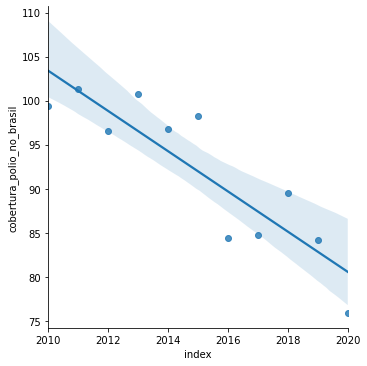

In [4]:
# Modelo de regressão linear da cobertura da Polio
sns.lmplot(data=cobertura_brasil.reset_index(), x='index', y='cobertura_polio_no_brasil')

# Leitura e tratamento dos dados relacionados a cobertura de vacinação estaduais, desde 1994 até 2021

## Leitura
Os dados podem ser encontrados no seguinte caminho:<br>
Portal da Saúde (SUS) >> Assistência à saúde >> Imunizações >> Cobertura<br><br>
Seleção dos dados:<br>
Linha: UF<br>
Coluna: Ano<br>
Medida: Coberturas Vacinais<br>
Período Disponível: 1994 - 2021<br>
*\* foi necessário realizar o download de um arquivo por ano, totalizando 27 arquivos*

Maiores informações podem ser encontradas [aqui](http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf)

## Tratamento
1. Leitura dos arquivos CSV e concatenação de toods em um único DataFrame
2. Período de análise compreende a ultima decada (2010 - 2020)
3. index = 'ano'

## Features extas
1. Média móvel de período = 3 anos
2. Velocidade de movimento da média móvel (diferenciação)
3. Aceleração do movimento da média móvel (diferenciação)

,uf,polio,ano
416,Rondônia,101.20,2010
417,Acre,104.03,2010
418,Amazonas,92.48,2010
419,Roraima,96.71,2010
420,Pará,103.38,2010


<AxesSubplot:xlabel='ano', ylabel='polio'>

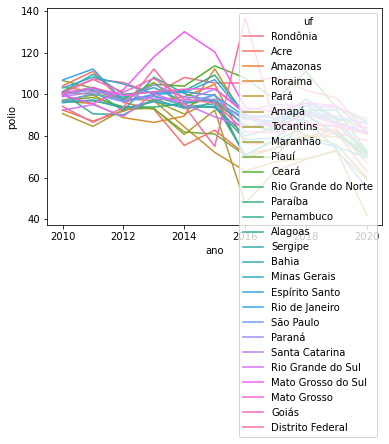

In [5]:
# Caminho dos arquivos
path = r'../data/raw/vac_cobertura/'

# encontra todos os arquivos csv dentro da pasta 'Path'
lista_de_arquivos = glob.glob(path + "/*.csv")

# Cria um array vazio de dataframes
lista_de_dataframe = []

# Para cada arquivo encontrado na pasta, roda a abertura e tratamento inicial
for arquivo in lista_de_arquivos:

    # Abre o arquivo csv e extrai a informação relacionada com a Poliomielite
    df = pd.read_csv(arquivo, sep=';', decimal=',', encoding='ISO-8859-1',usecols=['Unidade da Federação','Poliomielite'],
                     skipfooter=1, engine='python')
    # Renomeia nome das colunas
    df.columns = ['uf', 'polio']
    # Remove do UF o código do estado, EX: '11 Rondônia' -> 'Rondônia' | '52 Goiás' -> 'Goiás'
    df['uf'] = df['uf'].str[3:]
    # Extrai do nome do arquivo o ano relacionado com a informação
    df['ano'] = int(arquivo[-8:-4])
    # Adiciona o DataFrame lido na lista de DataFrames criados
    lista_de_dataframe.append(df)

# Transforma uma lista de DataFrames em um único DataFrame    
cobertura_uf = pd.concat(lista_de_dataframe, ignore_index=True)
# Remove do DataFrame informações posteriores a 2019, pois devido a pandemia, o padrão de vacinação pode ter se alterado.
cobertura_uf = cobertura_uf.query('ano <= 2020 and ano >= 2010')

display(cobertura_uf.head())
display(sns.lineplot(data=cobertura_uf, x='ano', y='polio', hue='uf'))

Será que os estados seguem a mesma tendencia de queda mostrada no país? Para não poluir a visualização, foram selecionados 7 estados aleatóriamente

<AxesSubplot:xlabel='ano', ylabel='polio'>

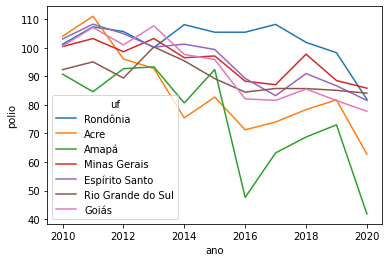

In [6]:
uf_aleatorio = pd.Series(cobertura_uf['uf'].unique()).sample(n=7, random_state=1515).tolist()
cobertura_random_uf = cobertura_uf.query('uf in @uf_aleatorio')
sns.lineplot(data=cobertura_random_uf, x='ano', y='polio', hue='uf')

In [7]:
tuplas = []
for uf in cobertura_uf['uf'].unique():
    mrl = linregress(cobertura_uf.query('uf == @uf')['ano'], cobertura_uf.query('uf == @uf')['polio'])
    tuplas.append([uf, mrl.slope, mrl.rvalue, ])
lineregress_by_uf = pd.DataFrame(tuplas, columns=['uf', 'slope', 'r-sqrd'])

In [8]:
lineregress_by_uf.describe()

,slope,r-sqrd
count,27.000000,27.000000
mean,-2.348010,-0.732335
std,1.123063,0.190126
min,-4.568273,-0.916066
25%,-2.910136,-0.860582
50%,-2.220000,-0.791827
75%,-1.590909,-0.683254
max,-0.616818,-0.191198


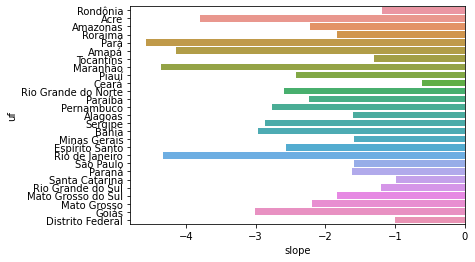

In [9]:
sns.barplot(data=lineregress_by_uf, x='slope', y='uf')
plt.show()

Todos estão os valores se encontram no quadrante negativo, mostrando que a tendência de queda na vacinação, apesar de certa variação entre estados, estão caindo ano a ano nos estados brasileiros

## Municipios

In [10]:
# Cobertura vacinal por município no ano de 2019
cobertura_municipio = pd.read_csv(r'../data/raw/vac_cobertura_municipio/cobertura_vacinal_por_municipio_2019.csv', sep=';', decimal=',', encoding='ISO-8859-1',
                         skipfooter=1, engine='python')
cobertura_municipio = cobertura_municipio[['Município', 'Poliomielite']]
cobertura_municipio[['municipio_no','municipio']] = pd.DataFrame(cobertura_municipio['Município'].str.split(' ', 1).tolist())
cobertura_municipio = cobertura_municipio.drop('Município', axis=1)
cobertura_municipio['municipio'] = cobertura_municipio['municipio'].str.replace(r"D\\",r"D", regex=True)
cobertura_municipio['municipio_no'] = cobertura_municipio['municipio_no'].astype(int)
cobertura_municipio.sort_values(by='Poliomielite').head()

,Poliomielite,municipio_no,municipio
2107,4.23,292300,NOVA VICOSA
4755,5.71,430710,HERVAL
3351,6.98,350745,BOREBI
4973,10.94,431700,SANTANA DA BOA VISTA
4642,13.21,430187,BARRA DO QUARAI


In [11]:
cod_uf = pd.DataFrame(pd.read_html('https://www.oobj.com.br/bc/article/quais-os-c%C3%B3digos-de-cada-uf-no-brasil-465.html')[0])
cod_uf.columns = ['codigo', 'estado', 'uf']
cod_uf['estado'] = cod_uf['estado'].replace(r' \(\*\)', r'', regex=True)

In [12]:
codigo_municipio_ibge = pd.read_html('https://www.ibge.gov.br/explica/codigos-dos-municipios.php')
cod_municipio = codigo_municipio_ibge[1:].copy()
for i in range(0,len(cod_municipio)):
    cod_municipio[i]['uf'] = cod_municipio[i].columns[0][14:]
    cod_municipio[i].columns = ['municipio', 'municipio_no', 'estado']
municipio = pd.concat(cod_municipio, ignore_index=True)
municipio['estado'] = municipio['estado'].replace('al', 'Distrito Federal')
municipio['municipio'] = municipio['municipio'].str.replace(r"D\\",r"D", regex=True)
municipio = municipio.merge(cod_uf, left_on='estado', right_on='estado')
municipio['uf_municipio'] = municipio['uf'].str.cat(municipio['municipio'], sep=': ')
municipio['municipio_no'] = municipio['municipio_no'].astype(str).str[:-1].astype(int)
municipio.head()

,municipio,municipio_no,estado,codigo,uf,uf_municipio
0,Acrelândia,120001,Acre,12,AC,AC: Acrelândia
1,Assis Brasil,120005,Acre,12,AC,AC: Assis Brasil
2,Brasiléia,120010,Acre,12,AC,AC: Brasiléia
3,Bujari,120013,Acre,12,AC,AC: Bujari
4,Capixaba,120017,Acre,12,AC,AC: Capixaba


In [13]:
cobertura_municipio_completo = cobertura_municipio.merge(municipio, left_on='municipio_no', right_on='municipio_no')
cobertura_municipio_completo = cobertura_municipio_completo.drop('municipio_x', axis=1)
cobertura_municipio_completo = cobertura_municipio_completo.rename(columns={'municipio_y' : 'municipio'})
cobertura_municipio_completo = cobertura_municipio_completo.set_index('municipio_no')
cobertura_municipio_completo.head()
cobertura_municipio_completo.sort_values(by='Poliomielite')[:10]

,Poliomielite,municipio,estado,codigo,uf,uf_municipio
municipio_no,,,,,,
292300,4.23,Nova Viçosa,Bahia,29,BA,BA: Nova Viçosa
430710,5.71,Herval,Rio Grande do Sul,43,RS,RS: Herval
350745,6.98,Borebi,São Paulo,35,SP,SP: Borebi
431700,10.94,Santana da Boa Vista,Rio Grande do Sul,43,RS,RS: Santana da Boa Vista
430187,13.21,Barra do Quaraí,Rio Grande do Sul,43,RS,RS: Barra do Quaraí
220210,16.07,Campinas do Piauí,Piauí,22,PI,PI: Campinas do Piauí
291840,17.25,Juazeiro,Bahia,29,BA,BA: Juazeiro
510300,17.39,Chapada dos Guimarães,Mato Grosso,51,MT,MT: Chapada dos Guimarães
210547,17.73,Jenipapo dos Vieiras,Maranhão,21,MA,MA: Jenipapo dos Vieiras


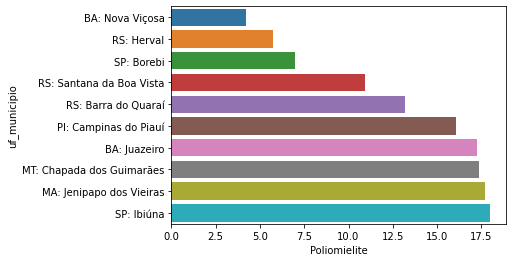

In [14]:
sns.barplot(data=cobertura_municipio_completo.sort_values(by='Poliomielite')[:10], x='Poliomielite', y='uf_municipio')
plt.show()

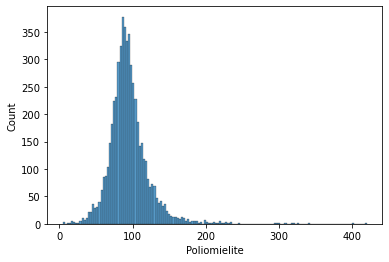

In [20]:
sns.histplot(cobertura_municipio_completo['Poliomielite'])
plt.show()

In [21]:
# Cobertura da vacinação contra Poliomelite no Brasil
cobertura_HB_brasil = pd.read_csv(r'../data/raw/vac_cobertura_ano/cobertura_por_imuno_por_ano_1994-2021.csv', sep=';', decimal=',', encoding='ISO-8859-1',
                         skipfooter=1, engine='python')
# Transpõe Linhas e Colunas
cobertura_HB_brasil = cobertura_HB_brasil.set_index('Imuno').T

# Remove a linha de totais do DataFrame
cobertura_HB_brasil = cobertura_HB_brasil.drop(' Total')

# Extrai somente a coluna 'Poliomelite' do Dataframe de imunos/ano
cobertura_HB_brasil = cobertura_HB_brasil[['Hepatite B']]

# Renomeia a coluna 'Poliomelite' por 'cobertura_polio_no_brasil'
cobertura_HB_brasil = cobertura_HB_brasil.rename(columns={'Hepatite B':'cobertura_HB_no_brasil'})

# Renomeia a coluna Index de 'Imuno' para 'ano'
cobertura_HB_brasil.columns.name = 'ano'

# Alterando o tipo do index de 'Object' para 'Int'
cobertura_HB_brasil.index = cobertura_HB_brasil.index.astype(int)

# Feature1: Média móvel de tamanho 3 na 'cobertura_polio_no_brasil'
cobertura_HB_brasil['rolling'] = cobertura_HB_brasil['cobertura_HB_no_brasil'].rolling(3).mean()

# Faz a diferenciação da média mível para ter uma 'velocidade' de alteração na média móvel da cobertura
cobertura_HB_brasil['velocidade'] = cobertura_HB_brasil['rolling'].diff()

# Faz a diferenciação da velocidade para ter uma 'aceleração' de alteração na média móvel da cobertura
cobertura_HB_brasil['aceleracao'] = cobertura_HB_brasil['velocidade'].diff()

# Seleciona valores referentes a ultima decada (2010 até 2020) da cobertura de vacinação no Brasil
cobertura_HB_brasil = cobertura_HB_brasil.loc[2010:2020]

<AxesSubplot:>

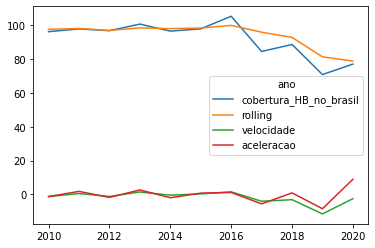

In [22]:
cobertura_HB_brasil.plot()

In [28]:
# Cobertura da vacinação contra Poliomelite no Brasil
cobertura_MC_brasil = pd.read_csv(r'../data/raw/vac_cobertura_ano/cobertura_por_imuno_por_ano_1994-2021.csv', sep=';', decimal=',', encoding='ISO-8859-1',
                         skipfooter=1, engine='python')
# Transpõe Linhas e Colunas
cobertura_MC_brasil = cobertura_MC_brasil.set_index('Imuno').T

# Remove a linha de totais do DataFrame
cobertura_MC_brasil = cobertura_MC_brasil.drop(' Total')

# Extrai somente a coluna 'Poliomelite' do Dataframe de imunos/ano
cobertura_MC_brasil = cobertura_MC_brasil[['Meningococo C']]

# Renomeia a coluna 'Poliomelite' por 'cobertura_polio_no_brasil'
cobertura_MC_brasil = cobertura_MC_brasil.rename(columns={'Meningococo C':'cobertura_MC_no_brasil'})

# Renomeia a coluna Index de 'Imuno' para 'ano'
cobertura_MC_brasil.columns.name = 'ano'

# Alterando o tipo do index de 'Object' para 'Int'
cobertura_MC_brasil.index = cobertura_MC_brasil.index.astype(int)

# Seleciona valores referentes a ultima decada (2010 até 2020) da cobertura de vacinação no Brasil
cobertura_MC_brasil = cobertura_MC_brasil.loc[2011:2020]

# Feature1: Média móvel de tamanho 3 na 'cobertura_polio_no_brasil'
cobertura_MC_brasil['rolling'] = cobertura_MC_brasil['cobertura_MC_no_brasil'].rolling(3).mean()

# Faz a diferenciação da média mível para ter uma 'velocidade' de alteração na média móvel da cobertura
cobertura_MC_brasil['velocidade'] = cobertura_MC_brasil['rolling'].diff()

# Faz a diferenciação da velocidade para ter uma 'aceleração' de alteração na média móvel da cobertura
cobertura_MC_brasil['aceleracao'] = cobertura_MC_brasil['velocidade'].diff()

<AxesSubplot:>

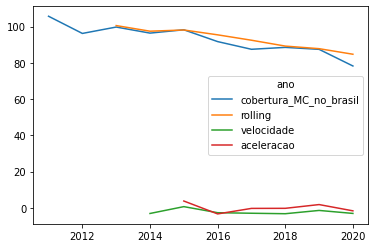

In [29]:
cobertura_MC_brasil.plot()